### 1. Trying out sentiment analysis models

In [2]:
from transformers import TFRobertaForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
import logging
from transformers import logging as transformers_logging

transformers_logging.set_verbosity_error()
logging.getLogger("transformers").setLevel(logging.ERROR)

labels = {
    0 : 'negative',
    1 : 'neutral',
    2 : 'positive'
}
def test_sentiment_score(text, tokenizer, model):
    encoded_input = tokenizer(text, return_tensors='tf')
    output = model(encoded_input)
    scores = output[0][0].numpy()
    scores = softmax(scores)
    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    ranked_labels = [labels[i] for i in ranking]
    return (ranked_labels[0])

def test_sentiment_score_raw(text, tokenizer, model):
    encoded_input = tokenizer(text, return_tensors = 'tf')
    output = model(encoded_input)
    scores = output[0][0].numpy()
    scores = softmax(scores)
    return scores

def test_sentiment_score_transformed(text, tokenizer, model):
    encoded_input = tokenizer(text, return_tensors='tf')
    output = model(encoded_input)
    scores = output[0].numpy()
    scores = softmax(scores, axis=1)
    sentiment_scores = scores[:, 2] - scores[:, 0]
    return sentiment_scores.tolist()

2024-06-05 21:08:36.213288: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-05 21:08:36.213433: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-05 21:08:36.386691: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import re
 
text = "Lufthansa lost my luggage"
model_roberta_latest = "cardiffnlp/twitter-roberta-base-sentiment-latest"
model_roberta_xlm = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
model_roberta_older = "cardiffnlp/twitter-roberta-base-sentiment"
model_name_bertweet = "finiteautomata/bertweet-base-sentiment-analysis"

tokenizer_xlm = AutoTokenizer.from_pretrained(model_roberta_xlm)
model_xlm = TFRobertaForSequenceClassification.from_pretrained(model_roberta_xlm)

sentiment_score_xlm = test_sentiment_score(text, tokenizer_xlm, model_xlm)
sentiment_score_xlm_raw = test_sentiment_score_raw(text, tokenizer_xlm, model_xlm)
sentiment_score_xlm_transformed = test_sentiment_score_transformed(text, tokenizer_xlm, model_xlm)


#print(f"Sentiment score ({re.search(r'[^/]+$', model_roberta_xlm).group(0)}): {sentiment_score_xlm}")
print(f"Model:({re.search(r'[^/]+$', model_roberta_xlm).group(0)}), tweet: ({text}), score: ({sentiment_score_xlm_raw}), label: ({sentiment_score_xlm})")
print(f"Model:({re.search(r'[^/]+$', model_roberta_xlm).group(0)}), tweet: ({text}), score: ({sentiment_score_xlm_transformed}), label: ({sentiment_score_xlm})")


/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

Model:(twitter-xlm-roberta-base-sentiment), tweet: (Lufthansa lost my luggage), score: ([0.8112232  0.166833   0.02194382]), label: (negative)
Model:(twitter-xlm-roberta-base-sentiment), tweet: (Lufthansa lost my luggage), score: ([-0.7892794013023376]), label: (negative)


In [4]:
### 2. Setting up dataframe for accuracy calculation

In [18]:
import pandas as pd

df_test = pd.read_csv('/kaggle/input/tweets-airlines/Tweets.csv')
df_test.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                                                                                             text  \
0                                                                                             @VirginAmerica What @dhepburn said.   
1                                                        @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                         @VirginAmerica I didn't today... Must mean I need to take another trip!   
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                         @VirginAmerica and it's a really big bad thing about it   

  tweet_coord              tweet_created tweet_location  \
0         NaN  2015-02-24 11:35:52 -0800            NaN   
1         NaN  2015-02-24 11:15:59 -0800            NaN   
2         NaN  2015-02-24 11:15:48 -0800      Lets Play   
3         NaN  2015-02-24 11:15:36 -0800            NaN   
4         NaN  2015-02-24 11:14:45 -0800            NaN   

                user_timezone  
0  Eastern Time (US & Canada)  
1  Pacific Time (US & Canada)  
2  Central Time (US & Canada)  
3  Pacific Time (US & Canada)  
4  Pacific Time (US & Canada)

In [19]:

df_test = df_test.head(1000) #Only doing this on the first 1000 tweets, to save time

In [20]:
pd.set_option('display.max_colwidth', None)  
df_test['roberta_xlm'] = df_test['text'].apply(lambda x: test_sentiment_score(x, tokenizer_xlm, model_xlm))

df_test

tweet_id airline_sentiment  airline_sentiment_confidence  \
0    570306133677760513           neutral                        1.0000   
1    570301130888122368          positive                        0.3486   
2    570301083672813571           neutral                        0.6837   
3    570301031407624196          negative                        1.0000   
4    570300817074462722          negative                        1.0000   
..                  ...               ...                           ...   
995  569970938525016065          negative                        1.0000   
996  569970599377788928          negative                        1.0000   
997  569970225443172353          negative                        1.0000   
998  569969999961391105          positive                        0.6915   
999  569969952654028800          positive                        1.0000   

             negativereason  negativereason_confidence         airline  \
0                       NaN                        NaN  Virgin America   
1                       NaN                     0.0000  Virgin America   
2                       NaN                        NaN  Virgin America   
3                Bad Flight                     0.7033  Virgin America   
4                Can't Tell                     1.0000  Virgin America   
..                      ...                        ...             ...   
995             Late Flight                     0.7065          United   
996             Late Flight                     1.0000          United   
997  Customer Service Issue                     0.6667          United   
998                     NaN                        NaN          United   
999                     NaN                        NaN          United   

    airline_sentiment_gold           name negativereason_gold  retweet_count  \
0                      NaN        cairdin                 NaN              0   
1                      NaN       jnardino                 NaN              0   
2                      NaN     yvonnalynn                 NaN              0   
3                      NaN       jnardino                 NaN              0   
4                      NaN       jnardino                 NaN              0   
..                     ...            ...                 ...            ...   
995                    NaN      tbird12lv                 NaN              0   
996                    NaN  cristobalwong                 NaN              0   
997                    NaN   itsmetsforme                 NaN              0   
998                    NaN     swampynomo                 NaN              0   
999                    NaN     herma48852                 NaN              0   

                                                                                                                                             text  \
0                                                                                                             @VirginAmerica What @dhepburn said.   
1                                                                        @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                         @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                         @VirginAmerica and it's a really big bad thing about it   
..                                                                                                                                            ...   
995                                            @united by the time I finally get to Dallas I could have driven with less frustration and cheaper.   
996                             @united I'm trying to get to my final de

### 3. Checking the accuracy by comparing model labels with human labels (on 100 first tweets)

In [21]:
matches = df_test['airline_sentiment'] == df_test['roberta_xlm']
percentage_matches = matches.mean() * 100
print(f"Accuracy of roberta_xlm model: {percentage_matches:.2f}%")

Accuracy of roberta_xlm model: 75.10%


In [22]:
df_test[["text", "airline_sentiment", "roberta_xlm"]].query("airline_sentiment == 'positive' and roberta_xlm == 'negative'").head(20)

text  \
1                                                                                       @VirginAmerica plus you've added commercials to the experience... tacky.   
114                           @VirginAmerica come back to #PHL already. We need you to take us out of this horrible cold. #pleasecomeback http://t.co/gLXFwP6nQH   
233                    @VirginAmerica, the only airline based in Silicon Valley! #disruption #FCmostinnovative #incubator  @FastCompany's http://t.co/wU3LbCNcr9   
307                                                                                 @VirginAmerica I mean. Probably inappropriate while on board.. But, it's on!   
375  @VirginAmerica  Flight Booking Problems last second flight for next week from SFO- to SAN any chance you want to gift me a promo code since I love you guys   
552                                         @united - thanks for your help...got me what I need, but its an issue with @_austrian . I guess I sit awhile longer.   
663                                                                                   @united private jet would have been cool! Do does not work. I'll try again   

    airline_sentiment roberta_xlm  
1            positive    negative  
114          positive    negative  
233          positive    negative  
307          positive    negative  
375          positive    negative  
552          positive    negative  
663          positive    negative

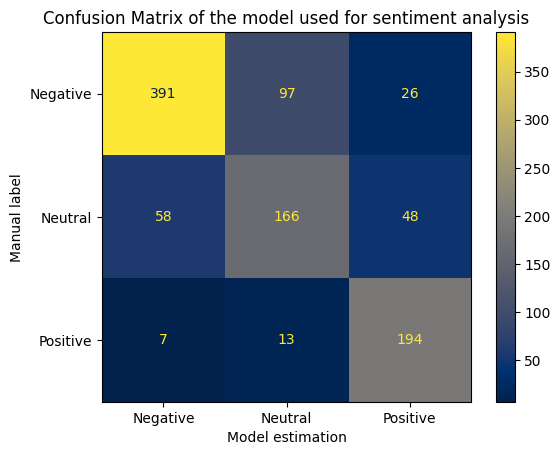

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Extract true sentiment and predicted sentiment
y_true = df_test['airline_sentiment']
y_pred = df_test['roberta_xlm']

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['negative', 'neutral', 'positive'])

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])

# Plot the confusion matrix
disp.plot(cmap='cividis')
plt.ylabel('Manual label')
plt.xlabel('Model estimation')
plt.title('Confusion Matrix of the model used for sentiment analysis');